# Remove the ACIS Readout Streak

In [1]:
#source /export/ciao/bin/ciao.bash -o
PFILES="./param;$ASCDS_INSTALL/param:$ASCDS_INSTALL/contrib/param"
mkdir -p ./param
ASCDS_WORK_PATH=./

In [2]:
/bin/rm -rf 1712
download_chandra_obsid 1712 evt2,asol
mv 1712/primary/*fits.gz ./
gunzip -f *fits.gz

dmkeypar *evt2.fits ASCDSVER echo+


  Type     Format      Size  0........H.........1  Download Time Average Rate
  ---------------------------------------------------------------------------
  evt2     fits       16 Mb  ####################          < 1 s  42930.6 kb/s
  asol     fits        6 Mb  ####################          < 1 s  25725.1 kb/s

      Total download size for ObsId 1712 = 23 Mb
      Total download time for ObsId 1712 = < 1 s

10.9.2


In [3]:
/bin/ls *fits

acisf01712N005_evt2.fits  pcadf01712_001N001_asol1.fits


## ds9 dead-reckoning

by eye


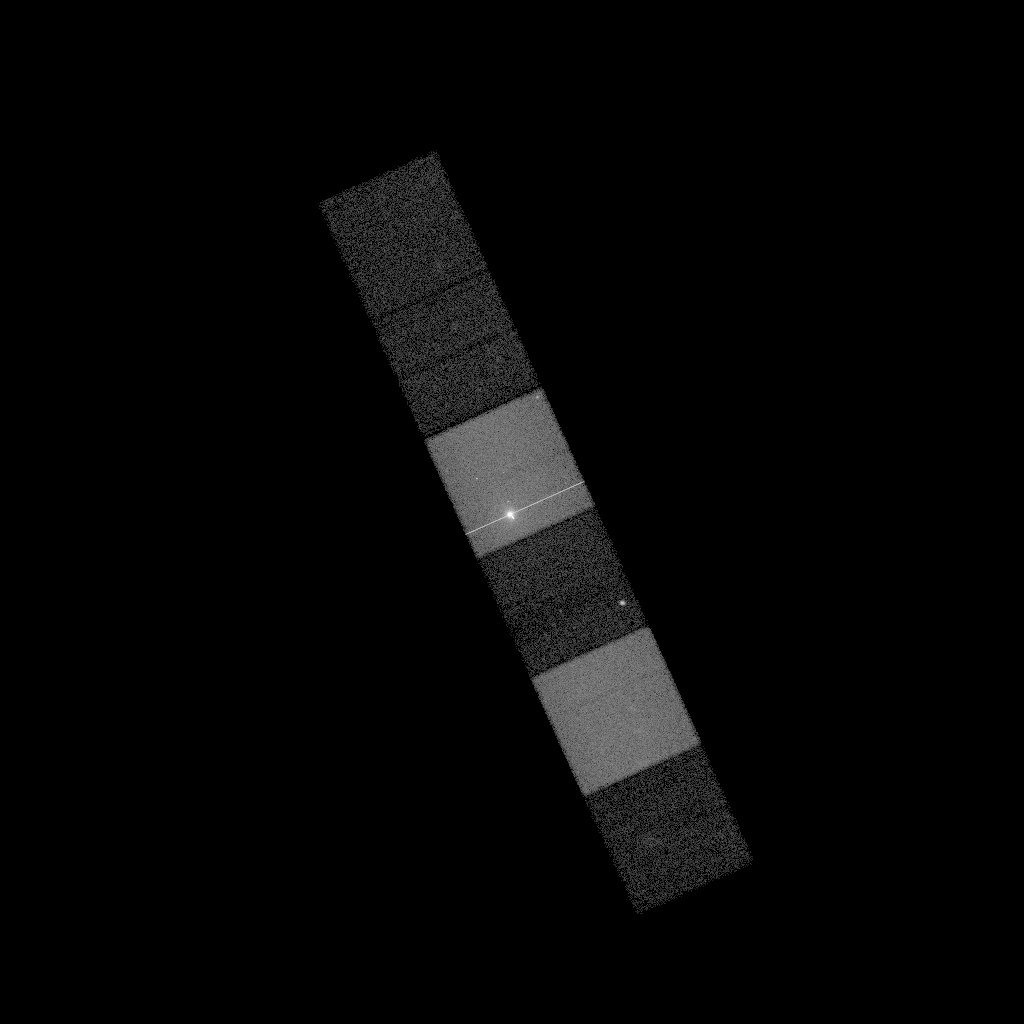

In [4]:
dmimg2jpg "acisf01712N005_evt2.fits[bin sky=8]" \
  outfile=1712.jpg mode=h clob+ maxred=500
display < 1712.jpg

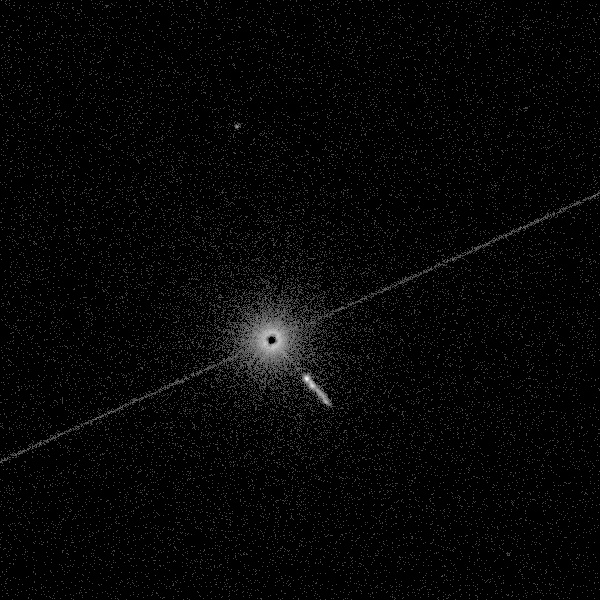

In [5]:
dmimg2jpg "acisf01712N005_evt2.fits[sky=box(4096.5,4096.5,300,300)][bin sky=0.5]" \
  outfile=1712_zoom.jpg mode=h clob+ maxred=200
display < 1712_zoom.jpg

## centroid

In [6]:
dmstat "acisf01712N005_evt2.fits[sky=circle(4082.25,4076.25,20)][bin sky=1]" centroid+ sig- med-

EVENTS_IMAGE(x, y)
    min:	0 	      @:	( 4083.75 4056.75 )
    max:	162 	      @:	( 4085.75 4078.75 )
cntrd[log] :	( 20.365025631 20.422719799 )
cntrd[phys]:	( 4082.1150256 4076.1727198 )
   good:	1264 
   null:	336 


## SIMBAD

In [7]:
dmcoords acisf01712N005_evt2.fits op=cel celfmt=hms ra= 12:29:06.700 dec=+02:03:08.60
pget dmcoords x y

4082.181976564152
4076.110245719566


In [8]:
x=4082.2
y=4076.1

## Create background spectrum

In [9]:
cat << EOM > bkg.reg
rotbox(4410.92,4353.0555,389.55054,66.92414,24.719781)
EOM

In [10]:
punlearn dmextract
pset dmextract infile="acisf01712N005_evt2.fits[sky=region(bkg.reg)][bin pi=1:1024:1]"
pset dmextract outfile=bkg_pi.fits
dmextract mode=h clob+


## Run ACISREADCORR


In [11]:
# Distance from src location to start of visible streak
dy=50

# Width of streak
dx=5


In [12]:
punlearn acisreadcorr

pset acisreadcorr infile=acisf01712N005_evt2.fits
pset acisreadcorr outfile=acis_1712_corr_evt2.fits
pset acisreadcorr aspect=pcadf01712_001N001_asol1.fits
pset acisreadcorr x=${x} y=${y}
pset acisreadcorr dx=${dx} dy=${dy}
pset acisreadcorr bkg=bkg_pi.fits
acisreadcorr mode=h clob+

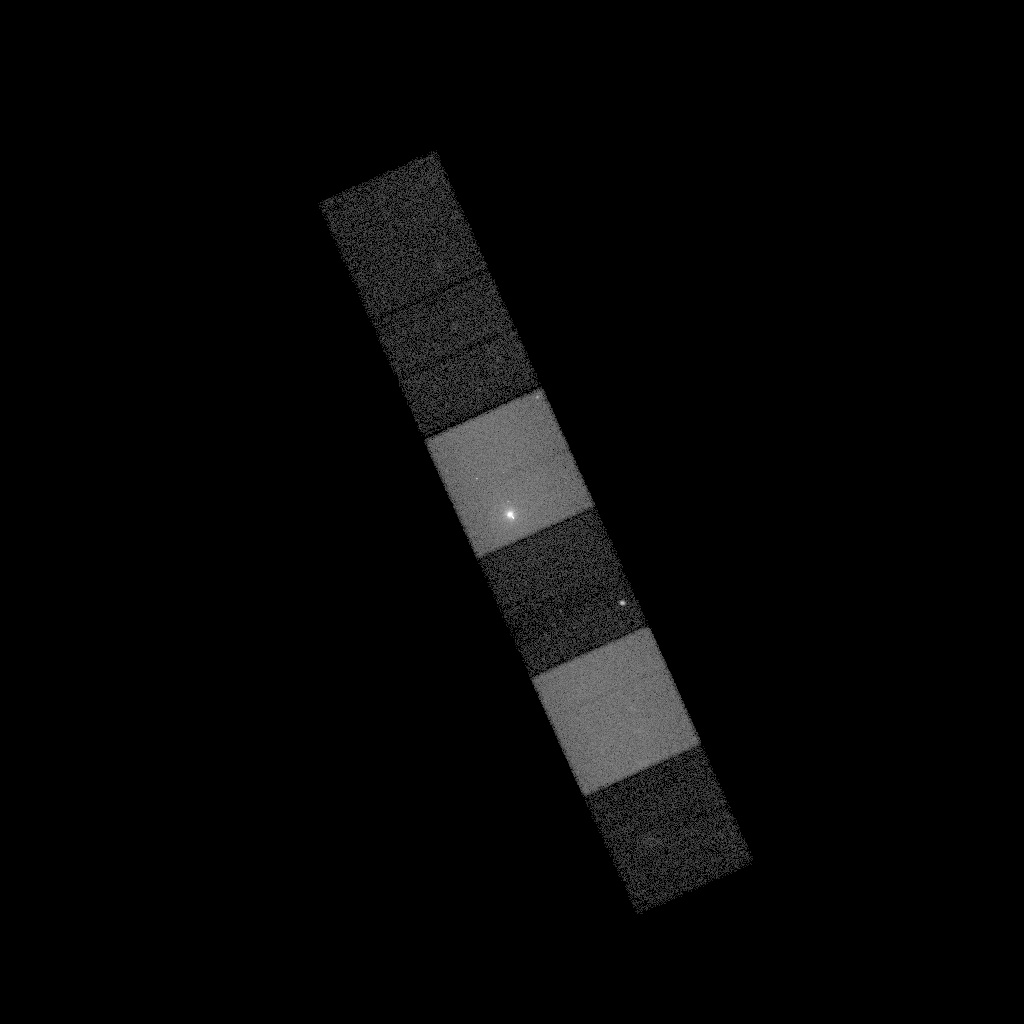

In [13]:
dmimg2jpg "acis_1712_corr_evt2.fits[bin sky=8]" \
  outfile=1712_corr.jpg mode=h clob+ maxred=500
display < 1712_corr.jpg

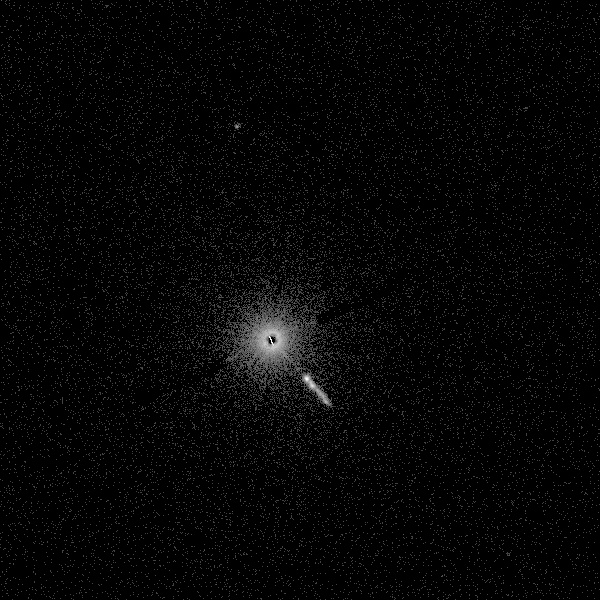

In [14]:
dmimg2jpg "acis_1712_corr_evt2.fits[sky=box(4096.5,4096.5,300,300)][bin sky=0.5]" \
  outfile=1712_corr_zoom.jpg mode=h clob+ maxred=200
display < 1712_corr_zoom.jpg

## No background spectrum


In [15]:
punlearn acisreadcorr

pset acisreadcorr infile=acisf01712N005_evt2.fits
pset acisreadcorr outfile=acis_1712_nobkgcorr_evt2.fits
pset acisreadcorr aspect=pcadf01712_001N001_asol1.fits
pset acisreadcorr x=${x} y=${y}
pset acisreadcorr dx=${dx} dy=${dy}
pset acisreadcorr bkg=""
acisreadcorr mode=h clob+

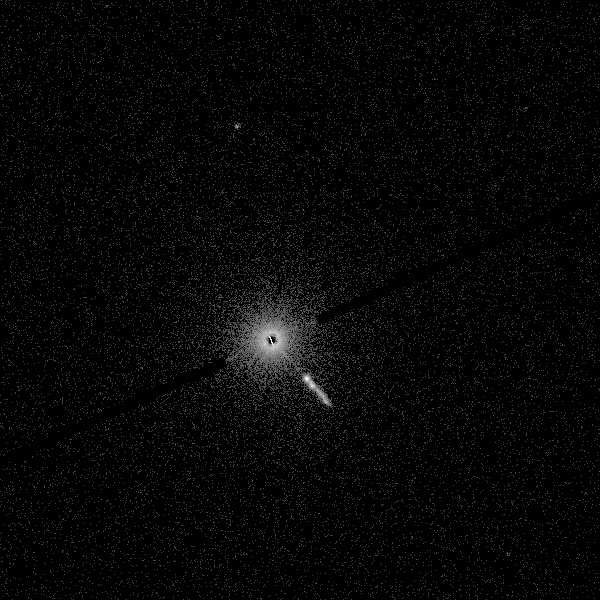

In [16]:
dmimg2jpg "acis_1712_nobkgcorr_evt2.fits[sky=box(4096.5,4096.5,300,300)][bin sky=0.5]" \
  outfile=1712_nobkgcorr_zoom.jpg mode=h clob+ maxred=200
display < 1712_nobkgcorr_zoom.jpg

## Status bits


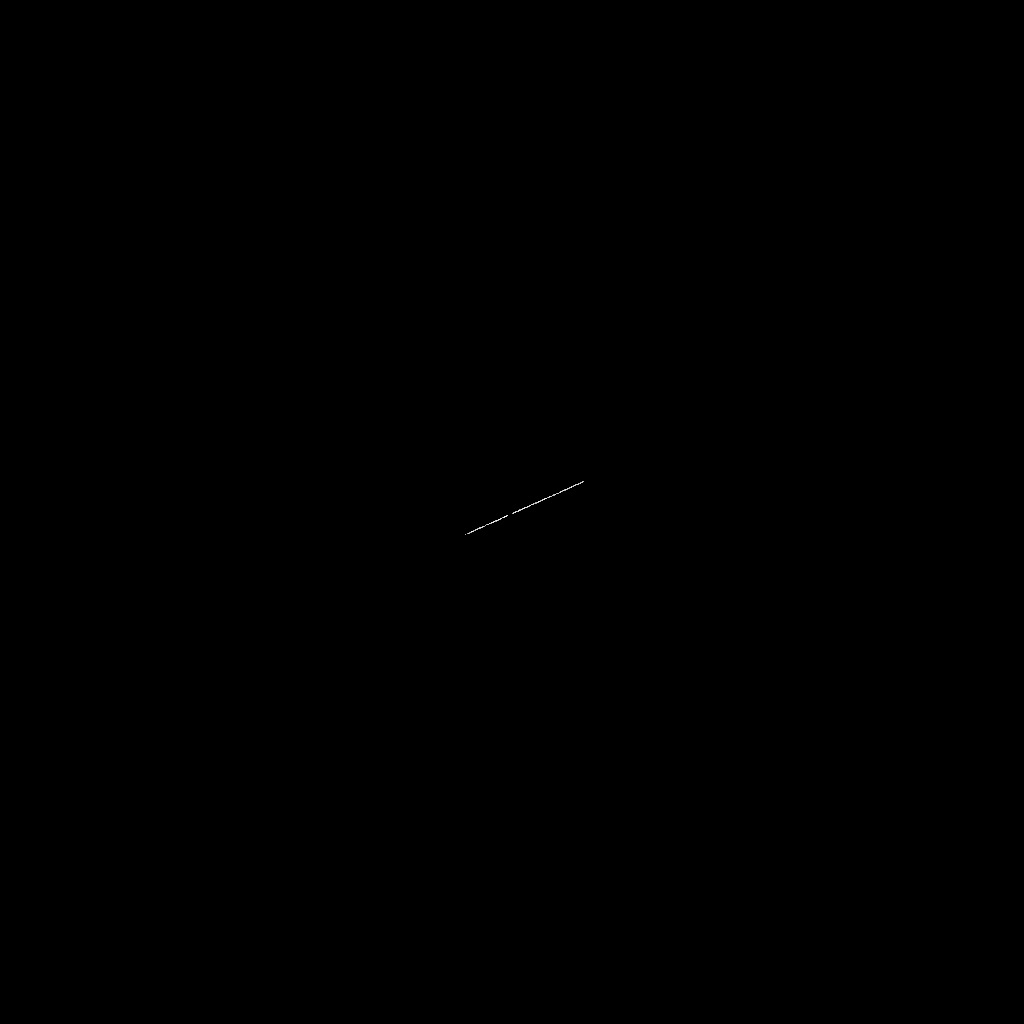

In [17]:
dmcopy "acis_1712_corr_evt2.fits[status=xxxxxxxxxx10xxxxxxxxxxxxxxxxxxxxx]" \
  flag_bkg.fits clob+
  
  
dmimg2jpg flag_bkg.fits"[bin sky=8]" outfile=flag_bkg.jpg mode=h clob+
display < flag_bkg.jpg

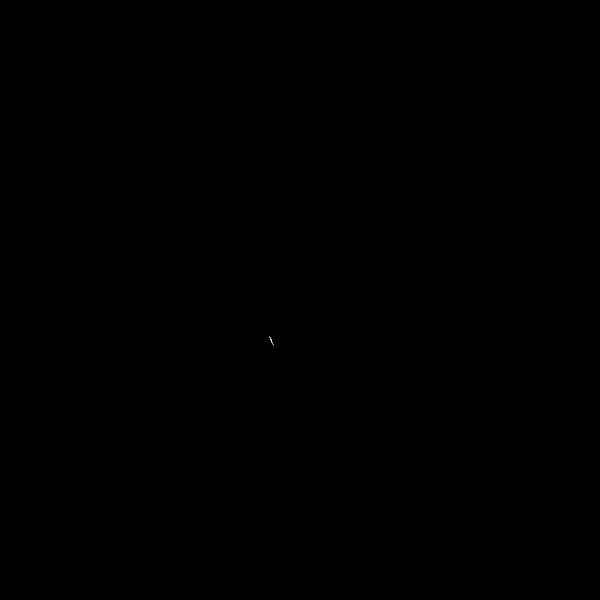

In [18]:
dmcopy "acis_1712_corr_evt2.fits[status=xxxxxxxxxx01xxxxxxxxxxxxxxxxxxxxx]" \
      flag_source.fits clob+
      
      
dmimg2jpg flag_source.fits"[sky=box(4096.5,4096.5,300,300)][bin sky=0.5]" \
  outfile=flag_source.jpg mode=h clob+
display < flag_source.jpg

# Cleanup


In [19]:
/bin/rm -rf 1712
/bin/rm -f acisf01712N00?_evt2.fits pcadf*asol1.fits